In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn import metrics

sns.set_style('darkgrid')

In [2]:
brecan = load_breast_cancer()
brecan.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
print(brecan['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
data = pd.DataFrame(brecan['data'], columns=brecan['feature_names'])
target = pd.Series(brecan['target'], name='target')
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
mer = pd.concat([data, target], axis=1)
mer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


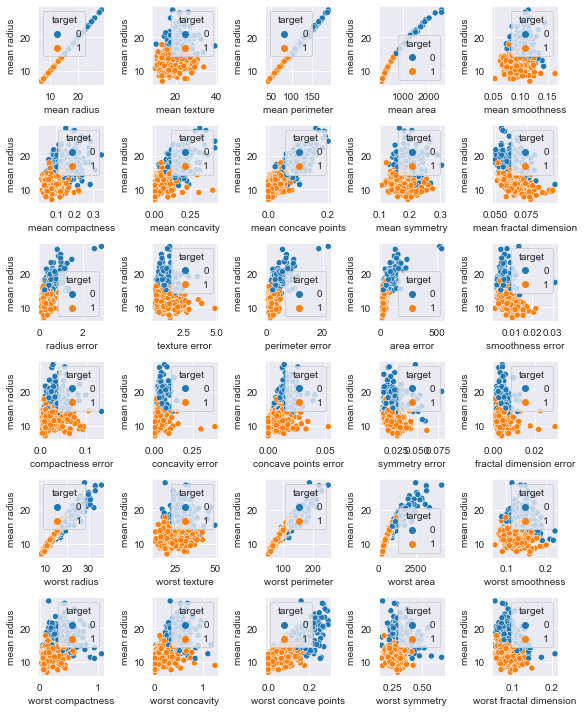

In [6]:
columns = list(data.columns)
plt.figure(figsize=(8,10))
k=1
for col in columns:
  plt.subplot(6,5,k)
  sns.scatterplot(x=col, y='mean radius', hue='target', data=mer)
  k+=1
plt.tight_layout()
plt.show()

## Model building

In [7]:
features = ['mean radius', 'mean texture', 'mean smoothness', 'mean compactness', 'mean concavity']

X = data[features]
y = target.copy()
X.head()

,mean radius,mean texture,mean smoothness,mean compactness,mean concavity
0,17.99,10.38,0.11840,0.27760,0.3001
1,20.57,17.77,0.08474,0.07864,0.0869
2,19.69,21.25,0.10960,0.15990,0.1974
3,11.42,20.38,0.14250,0.28390,0.2414
4,20.29,14.34,0.10030,0.13280,0.1980


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=5)

In [9]:
from statsmodels.api import Logit, add_constant

X_train_const = add_constant(X_train)
model_1 = Logit(y_train, X_train_const).fit()
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.136302
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  455
Model:                          Logit   Df Residuals:                      449
Method:                           MLE   Df Model:                            5
Date:                Fri, 04 Feb 2022   Pseudo R-squ.:                  0.7915
Time:                        21:21:24   Log-Likelihood:                -62.018
converged:                       True   LL-Null:                       -297.42
Covariance Type:            nonrobust   LLR p-value:                 1.595e-99
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               44.2720      6.232      7.104      0.000      32.058      56.486
mean radius         -1.4214      0.206     -6.901      0.000      -1.825      -1.018
mean texture        -0.4327      0.077     -5.640      0.000      -0.583      -0.282
mean smoothness   -148.0746     29.091     -5.090      0.000    -205.092     -91.057
mean compactness    15.7193     10.228      1.537      0.124      -4.328      35.766
mean concavity     -27.0204      6.256     -4.319      0.000     -39.282     -14.759
====================================================================================

Possibly complete quasi-separation: A fraction 0.19 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [10]:
prob_train = model_1.predict(X_train_const)

In [11]:
X_test_const = add_constant(X_test)
prob_test = model_1.predict(X_test_const)

In [12]:
threshold = 0.5
y_pred = (prob_test > threshold).astype(np.int8)

## Accuracy

In [13]:
metrics.accuracy_score(y_test,y_pred)

0.9385964912280702

In [14]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        48
           1       0.94      0.95      0.95        66

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



In [15]:
from sklearn.linear_model import LogisticRegression

model_2 = LogisticRegression(penalty='none')
model_2.fit(X_train, y_train)
y_pred_2 = model_2.predict(X_test)
metrics.accuracy_score(y_test, y_pred_2)

0.9385964912280702

In [16]:
(y_pred == y_pred_2).all()

True